# Task : Prediction Using Unsupervised ML

Author : Soukaina El Hadifi

Finding the optimum number of clusters

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt




# Load dataset into a DataFrame
df = pd.read_csv('Iris.csv', index_col=0)

# Display the first few rows of the DataFrame
print(df.head(10))

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa
6             5.4           3.9            1.7           0.4  Iris-setosa
7             4.6           3.4            1.4           0.3  Iris-setosa
8             5.0           3.4            1.5           0.2  Iris-setosa
9             4.4           2.9            1.4           0.2  Iris-setosa
10            4.9           3.1            1.5           0.1  Iris-setosa


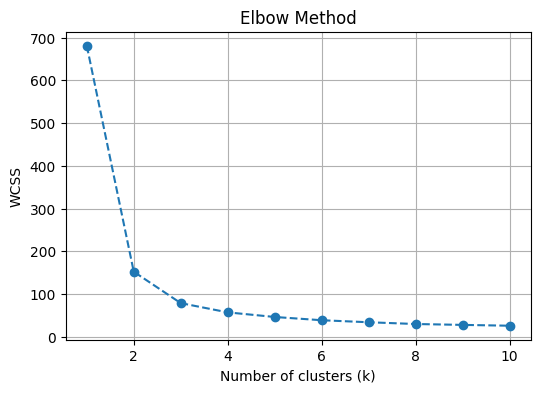

In [2]:
# Initialize empty list to store WCSS values
wcss = []

# Extracting the numeric data (features) from the DataFrame
X = df.iloc[:, [1, 2, 3, 4]].values

# Calculate WCSS for k between 1 and 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ calculates WCSS

# Plotting the Elbow method graph
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [3]:

# Based on the results from the Elbow Method ,we initialize KMeans with the optimal number of clusters (we choose 3 clusters)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

# Fit KMeans to the data
kmeans.fit(X)

# Predict the cluster labels
labels = kmeans.predict(X)

# Add the predicted labels to the original DataFrame
df['Cluster'] = labels

Visualize the clusters

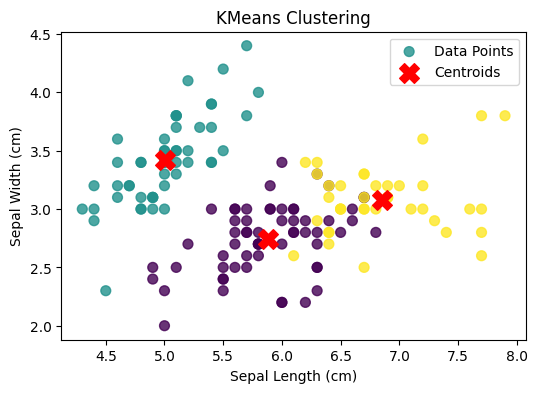

In [4]:
# Plotting the clusters
plt.figure(figsize=(6, 4))

# Scatter plot for Sepal features
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8, label='Data Points')

# Scatter plot for Petal features (uncomment if you want to plot)
# plt.scatter(X[:, 2], X[:, 3], c=labels, cmap='viridis', s=50, alpha=0.8, label='Data Points')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title('KMeans Clustering')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()